# **Importing the libraries**

In [86]:
# Data Handling
import pandas as pd                  # Data manipulation and analysis
import numpy as np                   # Numerical operations

# Data Visualization
import matplotlib.pyplot as plt       # Basic plotting
import seaborn as sns                 # Statistical data visualization
import plotly.express as px           # Interactive plots
import plotly.graph_objects as go     # Custom interactive plots
import polars as pl                   # Fast DataFrame library, alternative to pandas for big data

# Machine Learning - Models
from sklearn.linear_model import LinearRegression, LogisticRegression  # Linear models
from sklearn.tree import DecisionTreeClassifier                        # Decision Trees
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensembles
from sklearn.cluster import KMeans, DBSCAN                            # Clustering
from sklearn.svm import SVC                                            # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier                     # K-Nearest Neighbors
from xgboost import XGBClassifier                                      # Gradient Boosting (XGBoost)
from lightgbm import LGBMClassifier                                    # Gradient Boosting (LightGBM)

# Machine Learning - Preprocessing and Metrics
from sklearn.model_selection import train_test_split, GridSearchCV     # Splitting and model tuning
from sklearn.preprocessing import StandardScaler, LabelEncoder         # Scaling and encoding
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Metrics
from sklearn.impute import SimpleImputer                               # Handling missing values

# Additional EDA Libraries
from scipy import stats              # Statistical analysis
import missingno as msno             # Visualize missing values


# **Data Preprocessing**

# Step 1 : Reading the data

In [87]:
df = pl.read_csv("/content/customer_shopping_data.csv")
df_original = df.clone()
df

invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
str,str,str,i64,str,i64,f64,str,str,str
"""I138884""","""C241288""","""Female""",28,"""Clothing""",5,1500.4,"""Credit Card""","""5/8/2022""","""Kanyon"""
"""I317333""","""C111565""","""Male""",21,"""Shoes""",3,1800.51,"""Debit Card""","""12/12/2021""","""Forum Istanbul"""
"""I127801""","""C266599""","""Male""",20,"""Clothing""",1,300.08,"""Cash""","""9/11/2021""","""Metrocity"""
"""I173702""","""C988172""","""Female""",66,"""Shoes""",5,3000.85,"""Credit Card""","""16/05/2021""","""Metropol AVM"""
"""I337046""","""C189076""","""Female""",53,"""Books""",4,60.6,"""Cash""","""24/10/2021""","""Kanyon"""
…,…,…,…,…,…,…,…,…,…
"""I219422""","""C441542""","""Female""",45,"""Souvenir""",5,58.65,"""Credit Card""","""21/09/2022""","""Kanyon"""
"""I325143""","""C569580""","""Male""",27,"""Food & Beverage""",2,10.46,"""Cash""","""22/09/2021""","""Forum Istanbul"""
"""I824010""","""C103292""","""Male""",63,"""Food & Beverage""",2,10.46,"""Debit Card""","""28/03/2021""","""Metrocity"""


# Step 2: Data Profiling

In [88]:
df.describe()

statistic,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
str,str,str,str,f64,str,f64,f64,str,str,str
"""count""","""99457""","""99457""","""99457""",99457.0,"""99457""",99457.0,99457.0,"""99457""","""99457""","""99457"""
"""null_count""","""0""","""0""","""0""",0.0,"""0""",0.0,0.0,"""0""","""0""","""0"""
"""mean""",null,null,null,43.427089,null,3.003429,689.256321,null,null,null
"""std""",null,null,null,14.990054,null,1.413025,941.184567,null,null,null
"""min""","""I100008""","""C100004""","""Female""",18.0,"""Books""",1.0,5.23,"""Cash""","""1/1/2021""","""Cevahir AVM"""
"""25%""",null,null,null,30.0,null,2.0,45.45,null,null,null
"""50%""",null,null,null,43.0,null,3.0,203.3,null,null,null
"""75%""",null,null,null,56.0,null,4.0,1200.32,null,null,null
"""max""","""I999994""","""C999995""","""Male""",69.0,"""Toys""",5.0,5250.0,"""Debit Card""","""9/9/2022""","""Zorlu Center"""


# Step 3: Data Cleansing

# 1. Remove duplicates if there are any

In [89]:
df = df.unique(subset=['invoice_no'])

# 2. Handle missing values by imputing or removing

In [90]:
# Fill missing categorical columns with mode, numerical columns with median
df = df.with_columns([
    pl.col("gender").fill_null(pl.col("gender").mode()),
    pl.col("age").fill_null(pl.col("age").median()),
    pl.col("price").fill_null(pl.col("price").median()),
    pl.col("payment_method").fill_null("Unknown"),
    pl.col("category").fill_null("Unknown"),
    pl.col("shopping_mall").fill_null("Unknown")
])

In [91]:
df.null_count()

invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0


In [92]:
df = df.with_columns(
    (pl.col("quantity") * pl.col("price")).alias("total_spent")
)

# 3. Removing the Outliers

In [93]:
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the dataframe to keep only values within the bounds
    df_filtered = df.filter((pl.col(column) >= lower_bound) & (pl.col(column) <= upper_bound))
    return df_filtered

Apply the function to the numerical columns of interest

In [94]:
df = remove_outliers_iqr(df, "age")
df = remove_outliers_iqr(df, "quantity")
df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "total_spent")

# Step 4: Data Transformation

In [95]:
# Define possible date formats in a list
date_formats = ["%d/%m/%Y", "%Y-%m-%d", "%m-%d-%Y", "%d-%m-%Y" , "%d%m%Y" , "%m%d%Y" , "%Y%m%d" , "%Y%d%m"]

# Create a temporary column to store the original invoice_date values
df = df.with_columns(pl.col("invoice_date").alias("original_invoice_date"))

# Create a boolean mask indicating whether the date has been parsed successfully
parsed_mask = pl.lit(False)

for fmt in date_formats:

    df = df.with_columns(
        pl.when(~parsed_mask)
        .then(
            pl.col("original_invoice_date")
            .str.strptime(pl.Date, fmt, strict=False) # Apply strict=False here for error handling
            .fill_null(pl.col("invoice_date"))
        )
        .otherwise(pl.col("invoice_date"))
        .alias("invoice_date")
    )

    parsed_mask = parsed_mask | (pl.col("original_invoice_date").str.strptime(pl.Date, fmt, strict=False).is_not_null())

# Drop the temporary column
df = df.drop("original_invoice_date")

In [96]:

df = df.with_columns(pl.col("invoice_date").cast(pl.Date))

In [97]:
df.select("invoice_date").head()

invoice_date
date
2022-01-25
2021-06-16
2022-09-04
2022-08-06
2023-02-26


# Standardize the 'gender' column to 'Male' and 'Female'

In [98]:


df = df.with_columns(
    pl.when(pl.col("gender").str.to_lowercase() == "m")
    .then(pl.lit("Male"))
    .when(pl.col("gender").str.to_lowercase() == "f")
    .then(pl.lit("Female"))
    .when(pl.col("gender").str.to_lowercase() == "male")
    .then(pl.lit("Male"))
    .when(pl.col("gender").str.to_lowercase() == "female")
    .then(pl.lit("Female"))
    .when(pl.col("gender").str.to_lowercase() == "Female")
    .then(pl.lit("Female"))
     .when(pl.col("gender").str.to_lowercase() == "Male")
    .then(pl.lit("Male"))
    .otherwise(pl.lit("Unknown"))
    .alias("gender")
)

In [99]:
df.select("gender").unique()

gender
str
"""Female"""
"""Male"""


#  how much data was impacted by the cleaning process.

In [100]:
initial_length = len(df_original)
initial_length

99457

In [101]:
cleaned_length = len(df)
cleaned_length

85471

In [102]:
data_retained_ratio = cleaned_length / initial_length
data_lost_percentage = (1 - data_retained_ratio) * 100
print(f"Data Lost Percentage: {data_lost_percentage:.2f}%")

Data Lost Percentage: 14.06%


# **Data Analysis**

# 1. Descriptive analysis




*   Descriptive analysis is the very first analysis performed in the data analysis process.

* It involves common, descriptive statistics like measures of central tendency, variability, frequency and position.

*   It generates simple summaries of samples and measurements.



**1. Summary Statistics**

In [103]:
df.describe()

statistic,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent
str,str,str,str,f64,str,f64,f64,str,str,str,f64
"""count""","""85471""","""85471""","""85471""",85471.0,"""85471""",85471.0,85471.0,"""85471""","""85471""","""85471""",85471.0
"""null_count""","""0""","""0""","""0""",0.0,"""0""",0.0,0.0,"""0""","""0""","""0""",0.0
"""mean""",null,null,null,43.413474,null,2.7357,404.884743,null,"""2022-02-03 19:05:41.126000""",null,1137.152475
"""std""",null,null,null,14.993148,null,1.323746,491.837973,null,null,null,1552.912965
"""min""","""I100014""","""C100005""","""Female""",18.0,"""Books""",1.0,5.23,"""Cash""","""2021-01-01""","""Cevahir AVM""",5.23
"""25%""",null,null,null,30.0,null,2.0,35.84,null,"""2021-07-19""",null,105.57
"""50%""",null,null,null,43.0,null,3.0,162.64,null,"""2022-02-04""",null,365.94
"""75%""",null,null,null,56.0,null,4.0,600.17,null,"""2022-08-21""",null,1200.32
"""max""","""I999973""","""C999995""","""Male""",69.0,"""Toys""",5.0,2100.0,"""Debit Card""","""2023-03-08""","""Zorlu Center""",5401.53


**2. Frequency Counts for Categorical Columns**

In [104]:
gender_counts = df.select(pl.col("gender").value_counts())
category_counts = df.select(pl.col("category").value_counts())
payment_counts = df.select(pl.col("payment_method").value_counts())

print("Gender Counts:")
print(gender_counts)
print("\nCategory Counts:")
print(category_counts)
print("\nPayment Method Counts:")
print(payment_counts)

Gender Counts:
shape: (2, 1)
┌──────────────────┐
│ gender           │
│ ---              │
│ struct[2]        │
╞══════════════════╡
│ {"Male",34306}   │
│ {"Female",51165} │
└──────────────────┘

Category Counts:
shape: (8, 1)
┌───────────────────────────┐
│ category                  │
│ ---                       │
│ struct[2]                 │
╞═══════════════════════════╡
│ {"Technology",1985}       │
│ {"Books",4981}            │
│ {"Toys",10087}            │
│ {"Souvenir",4999}         │
│ {"Cosmetics",15097}       │
│ {"Food & Beverage",14776} │
│ {"Shoes",5999}            │
│ {"Clothing",27547}        │
└───────────────────────────┘

Payment Method Counts:
shape: (3, 1)
┌───────────────────────┐
│ payment_method        │
│ ---                   │
│ struct[2]             │
╞═══════════════════════╡
│ {"Credit Card",30076} │
│ {"Debit Card",17263}  │
│ {"Cash",38132}        │
└───────────────────────┘


In [105]:
df_pd = df.to_pandas()

# 1. Gender Frequency Plot

In [106]:
gender_counts = df_pd['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
fig_gender = px.bar(gender_counts, x='gender', y='count', title="Gender Distribution", labels={'count': 'Count', 'gender': 'Gender'})
fig_gender.show()

# 2. Category Frequency Plot

In [107]:
category_counts = df_pd['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
fig_category = px.bar(category_counts, x='category', y='count', title="Category Distribution", labels={'count': 'Count', 'category': 'Category'})
fig_category.update_layout(xaxis={'categoryorder': 'total descending'})  # Sort by count
fig_category.show()

# 3. Payment Method Frequency Plot

In [108]:
payment_counts = df_pd['payment_method'].value_counts().reset_index()
payment_counts.columns = ['payment_method', 'count']
fig_payment = px.bar(payment_counts, x='payment_method', y='count', title="Payment Method Distribution", labels={'count': 'Count', 'payment_method': 'Payment Method'})
fig_payment.show()

**3. Analyze Unique Values**

In [109]:
unique_counts = df.select([
    pl.col("customer_id").n_unique().alias("unique_customers"),
    pl.col("category").n_unique().alias("unique_categories"),
    pl.col("shopping_mall").n_unique().alias("unique_malls")
])

print("Unique Value Counts:")
print(unique_counts)

Unique Value Counts:
shape: (1, 3)
┌──────────────────┬───────────────────┬──────────────┐
│ unique_customers ┆ unique_categories ┆ unique_malls │
│ ---              ┆ ---               ┆ ---          │
│ u32              ┆ u32               ┆ u32          │
╞══════════════════╪═══════════════════╪══════════════╡
│ 85471            ┆ 8                 ┆ 10           │
└──────────────────┴───────────────────┴──────────────┘


**4. Correlation Analysis**

In [110]:
correlation_age_quantity = df.select(pl.corr("age", "quantity"))
correlation_quantity_price = df.select(pl.corr("quantity", "price"))

print("Correlation between Age and Quantity:")
print(correlation_age_quantity)
print("\nCorrelation between Quantity and Price:")
print(correlation_quantity_price)

Correlation between Age and Quantity:
shape: (1, 1)
┌───────────┐
│ age       │
│ ---       │
│ f64       │
╞═══════════╡
│ -0.000843 │
└───────────┘

Correlation between Quantity and Price:
shape: (1, 1)
┌──────────┐
│ quantity │
│ ---      │
│ f64      │
╞══════════╡
│ 0.045325 │
└──────────┘


In [111]:
df.columns

['invoice_no',
 'customer_id',
 'gender',
 'age',
 'category',
 'quantity',
 'price',
 'payment_method',
 'invoice_date',
 'shopping_mall',
 'total_spent']

In [112]:
import plotly.graph_objects as go

correlation_matrix = df.select(['age', 'quantity', 'price', 'total_spent']).corr()

# Step 2: Convert to Pandas DataFrame for Plotly compatibility
correlation_matrix_pd = correlation_matrix.to_pandas()

# Step 3: Create a heatmap for the correlation matrix using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix_pd.values,
    x=correlation_matrix_pd.columns,
    y=correlation_matrix_pd.columns,
    colorscale="Viridis",
    zmin=-1, zmax=1
))

# Customize layout
fig.update_layout(
    title="Correlation Matrix",
    xaxis_title="Features",
    yaxis_title="Features",
    width=500, height=500
)

# Show the plot
fig.show()


# **Diagnostic analysis**

Diagnostic analysis seeks to answer the question “Why did this happen?” by taking a more in-depth look at data to uncover subtle patterns.

**1. Identifying Anomalies in Sales Trends**

In [113]:
df

invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent
str,str,str,f64,str,i64,f64,str,date,str,f64
"""I312008""","""C167515""","""Male""",66.0,"""Clothing""",4,1200.32,"""Cash""",2022-01-25,"""Istinye Park""",4801.28
"""I140941""","""C182320""","""Female""",29.0,"""Shoes""",3,1800.51,"""Cash""",2021-06-16,"""Mall of Istanbul""",5401.53
"""I329843""","""C330673""","""Male""",24.0,"""Cosmetics""",4,162.64,"""Credit Card""",2022-09-04,"""Cevahir AVM""",650.56
"""I485384""","""C137164""","""Female""",47.0,"""Shoes""",3,1800.51,"""Credit Card""",2022-08-06,"""Zorlu Center""",5401.53
"""I953809""","""C843176""","""Female""",27.0,"""Cosmetics""",2,81.32,"""Credit Card""",2023-02-26,"""Metrocity""",162.64
…,…,…,…,…,…,…,…,…,…,…
"""I292201""","""C600218""","""Female""",43.0,"""Food & Beverage""",1,5.23,"""Cash""",2021-10-31,"""Cevahir AVM""",5.23
"""I306467""","""C317682""","""Female""",32.0,"""Cosmetics""",3,121.98,"""Credit Card""",2022-03-29,"""Istinye Park""",365.94
"""I317576""","""C230474""","""Male""",38.0,"""Clothing""",4,1200.32,"""Credit Card""",2021-11-08,"""Metropol AVM""",4801.28


In [114]:
# Extract the month from 'invoice_date' for monthly grouping
df = df.with_columns(pl.col("invoice_date").dt.month().alias("month"))

df

invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spent,month
str,str,str,f64,str,i64,f64,str,date,str,f64,i8
"""I312008""","""C167515""","""Male""",66.0,"""Clothing""",4,1200.32,"""Cash""",2022-01-25,"""Istinye Park""",4801.28,1
"""I140941""","""C182320""","""Female""",29.0,"""Shoes""",3,1800.51,"""Cash""",2021-06-16,"""Mall of Istanbul""",5401.53,6
"""I329843""","""C330673""","""Male""",24.0,"""Cosmetics""",4,162.64,"""Credit Card""",2022-09-04,"""Cevahir AVM""",650.56,9
"""I485384""","""C137164""","""Female""",47.0,"""Shoes""",3,1800.51,"""Credit Card""",2022-08-06,"""Zorlu Center""",5401.53,8
"""I953809""","""C843176""","""Female""",27.0,"""Cosmetics""",2,81.32,"""Credit Card""",2023-02-26,"""Metrocity""",162.64,2
…,…,…,…,…,…,…,…,…,…,…,…
"""I292201""","""C600218""","""Female""",43.0,"""Food & Beverage""",1,5.23,"""Cash""",2021-10-31,"""Cevahir AVM""",5.23,10
"""I306467""","""C317682""","""Female""",32.0,"""Cosmetics""",3,121.98,"""Credit Card""",2022-03-29,"""Istinye Park""",365.94,3
"""I317576""","""C230474""","""Male""",38.0,"""Clothing""",4,1200.32,"""Credit Card""",2021-11-08,"""Metropol AVM""",4801.28,11


In [115]:
monthly_sales = df.group_by("month").agg([
    pl.col("total_spent").sum().alias("monthly_total_spent")
])

In [116]:
# Convert to Pandas for visualization
monthly_sales_pd = monthly_sales.to_pandas()

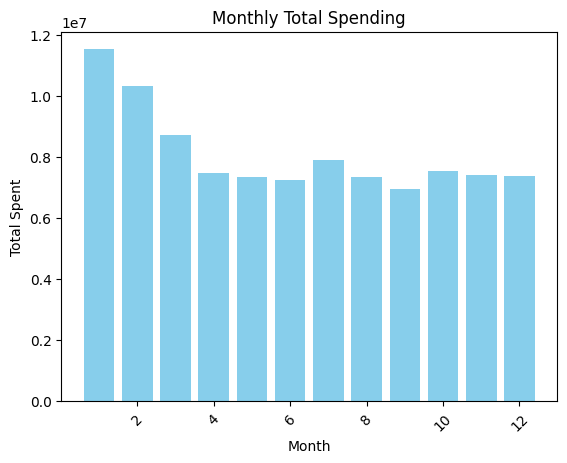

In [117]:
# Bar plot for monthly total spending
plt.bar(monthly_sales_pd["month"], monthly_sales_pd["monthly_total_spent"], color="skyblue")
plt.title("Monthly Total Spending")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

**2. Historical Comparison for Category Sales**

In [118]:
# Group by 'category' and 'invoice_date' (monthly) to observe category-wise sales trends
category_sales = df.group_by(["category", pl.col("invoice_date").dt.month()]).agg([
    pl.col("total_spent").sum().alias("monthly_category_sales")
])

In [119]:
category_sales_pd = category_sales.to_pandas()
category_sales_pivot = category_sales_pd.pivot(index="invoice_date", columns="category", values="monthly_category_sales")

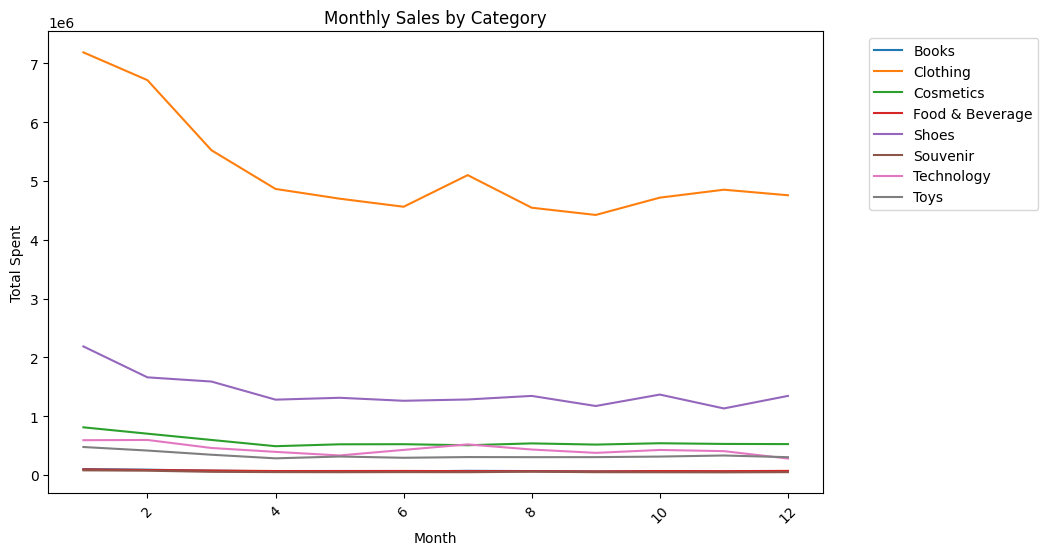

In [120]:
category_sales_pivot.plot(kind="line", figsize=(10, 6), title="Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**3. Investigating Customer Segmentation (High-Spending Customers)**

If the data shows that a small group of customers contributes significantly to the total sales, we can identify and investigate this group to understand its behavior.

In [121]:
# Group by customer and calculate total spending per customer
customer_spending = df.group_by("customer_id").agg([
    pl.col("total_spent").sum().alias("total_spent_by_customer")
])

In [122]:
# Identify high-spending customers (top 10% of spenders)
threshold = customer_spending["total_spent_by_customer"].quantile(0.9)
high_spenders = customer_spending.filter(pl.col("total_spent_by_customer") >= threshold)

print("High-Spending Customers:")
print(high_spenders)

High-Spending Customers:
shape: (8_859, 2)
┌─────────────┬─────────────────────────┐
│ customer_id ┆ total_spent_by_customer │
│ ---         ┆ ---                     │
│ str         ┆ f64                     │
╞═════════════╪═════════════════════════╡
│ C192117     ┆ 4801.28                 │
│ C184553     ┆ 5401.53                 │
│ C321572     ┆ 4801.28                 │
│ C288241     ┆ 5401.53                 │
│ C515799     ┆ 4801.28                 │
│ …           ┆ …                       │
│ C256333     ┆ 4801.28                 │
│ C237768     ┆ 4801.28                 │
│ C180940     ┆ 4801.28                 │
│ C280166     ┆ 5401.53                 │
│ C175466     ┆ 4801.28                 │
└─────────────┴─────────────────────────┘


**4. Exploring Category Popularity by Payment Method**

An unusual pattern in payment methods for specific categories might reveal purchasing preferences that align with marketing campaigns or customer demographics.

In [124]:
# Group by category and payment method to see which methods are preferred for each category
payment_method_analysis  = df.group_by(["category", "payment_method"]).agg([
    pl.col("total_spent").sum().alias("total_spent")
])


In [125]:
payment_method_analysis_pd = payment_method_analysis.to_pandas()
payment_pivot = payment_method_analysis_pd.pivot(index="category", columns="payment_method", values="total_spent")


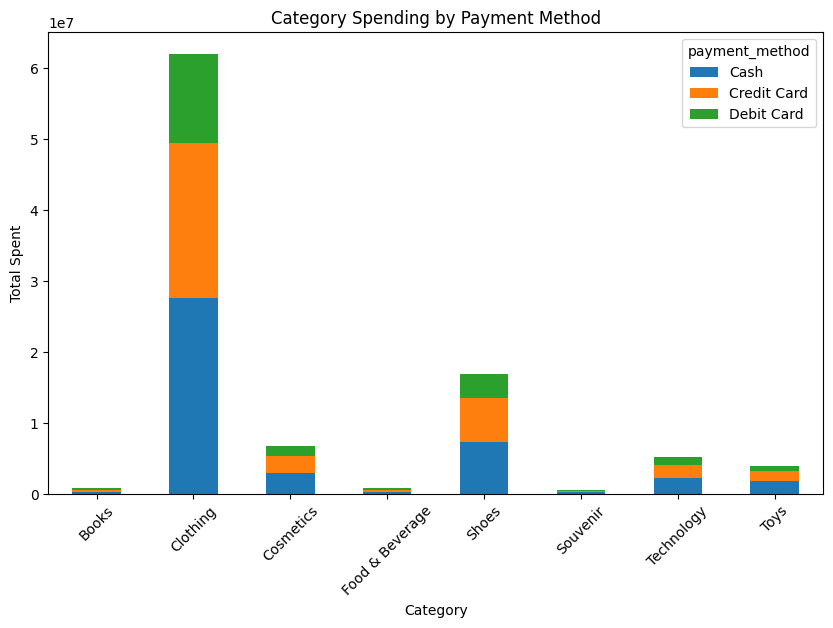

In [126]:
payment_pivot.plot(kind="bar", stacked=True, figsize=(10, 6), title="Category Spending by Payment Method")
plt.xlabel("Category")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()